In [ ]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [ ]:
mnist = tf.keras.datasets.mnist
(x_train,y_train),(x_test,y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
x_train = tf.keras.utils.normalize(x_train,axis = 1)
x_test = tf.keras.utils.normalize(x_test,axis = 1)

In [ ]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten(input_shape =(28,28)))
model.add(tf.keras.layers.Dense(units=128,activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(units=128,activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(units=10,activation=tf.nn.softmax))

In [ ]:

model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [ ]:
model.fit(x_train,y_train,epochs =3)

Epoch 1/3
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2659 - accuracy: 0.9231
Epoch 2/3
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1073 - accuracy: 0.9673
Epoch 3/3
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0728 - accuracy: 0.9772


In [ ]:
loss, accuracy = model.evaluate(x_test,y_test)
print(accuracy)
print(loss)

313/313 [==============================] - 1s 2ms/step - loss: 0.0929 - accuracy: 0.9701
0.9700999855995178
0.09294310212135315


In [ ]:
model.save('digits.model')

1/1 [==============================] - 0s 36ms/step
Result is probably 2


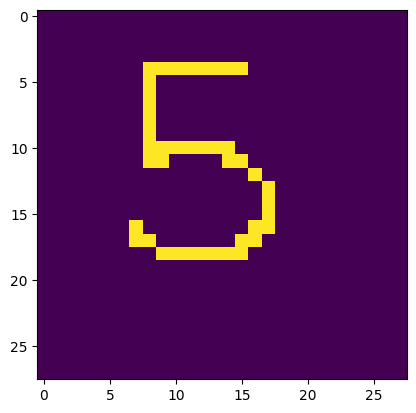

1/1 [==============================] - 0s 35ms/step
Result is probably 2


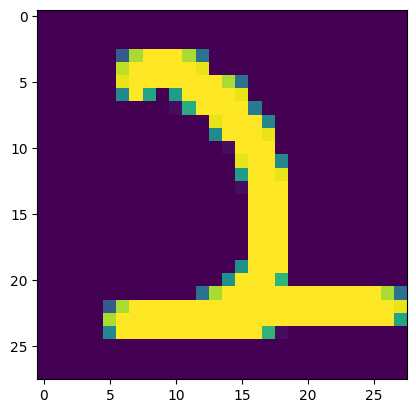

1/1 [==============================] - 0s 53ms/step
Result is probably 3


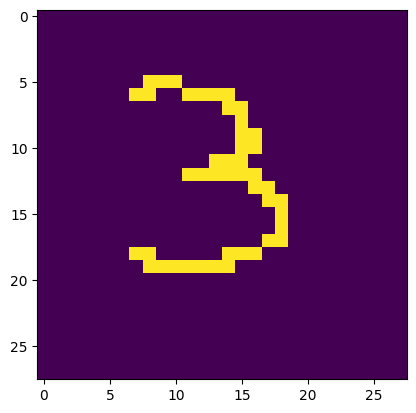

1/1 [==============================] - 0s 33ms/step
Result is probably 8


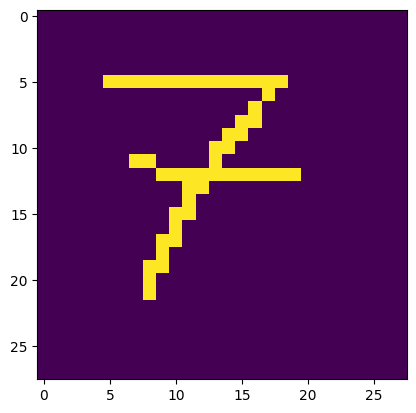

1/1 [==============================] - 0s 38ms/step
Result is probably 5


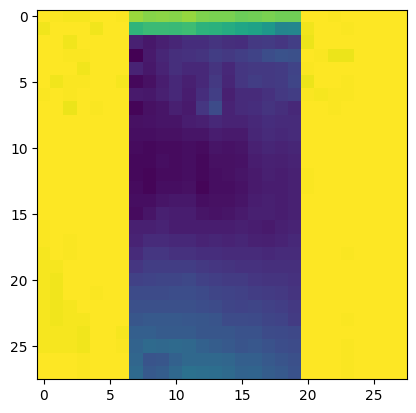

In [ ]:
for x in range(1,6):
  img = cv.imread(f'{x}.png')[:,:,0]
  img = np.invert(np.array([img]))
  prediction = model.predict(img)
  print(f'Result is probably {np.argmax(prediction)}')
  plt.imshow(img[0])
  plt.show()